In [1]:
# Import các thư viện cần thiết
import pandas as pd
# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/input/Bitcoin Historical Data.csv')
# Hiển thị 10 dòng đầu tiên của dữ liệu
print(data.head(10))


           Date     Price      Open      High       Low     Vol. Change %
0  Aug 02, 2020  11,105.8  11,802.6  12,061.1  10,730.7  698.62K   -5.91%
1  Aug 01, 2020  11,803.1  11,333.2  11,847.7  11,226.1  611.47K    4.14%
2  Jul 31, 2020  11,333.4  11,096.5  11,434.8  10,964.6  530.95K    2.14%
3  Jul 30, 2020  11,096.2  11,105.8  11,164.4  10,861.6  501.14K   -0.09%
4  Jul 29, 2020  11,105.9  10,908.4  11,336.5  10,771.8  576.83K    1.81%
5  Jul 28, 2020  10,908.5  10,961.1  11,046.1  10,873.6  658.37K   -1.04%
6  Jul 27, 2020  11,022.8   9,932.7  11,367.0   9,894.6  908.99K   10.98%
7  Jul 26, 2020   9,932.5   9,690.0  10,086.6   9,645.9  415.07K    2.35%
8  Jul 25, 2020   9,704.1   9,546.7   9,729.3   9,536.2  306.29K    1.65%
9  Jul 24, 2020   9,546.4   9,599.2   9,626.2   9,480.5  359.16K   -0.55%


In [2]:
#Phân tích dữ liệu
#Xem xem có thiếu dữ liệu không?
print(data.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/input/Bitcoin Historical Data.csv')

# Chuyển cột 'Date' thành kiểu datetime
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')

# Chuyển các cột số thành float sau khi loại bỏ dấu phẩy
data['Price'] = data['Price'].astype(str).str.replace(',', '').astype(float)
data['Open'] = data['Open'].astype(str).str.replace(',', '').astype(float)
data['High'] = data['High'].astype(str).str.replace(',', '').astype(float)
data['Low'] = data['Low'].astype(str).str.replace(',', '').astype(float)

# Chuyển cột 'Change %' thành số (loại bỏ dấu '%' và chuyển thành float)
data['Change %'] = data['Change %'].astype(str).str.replace('%', '').astype(float)

# Tạo cột 'Price Change Direction' để phân loại tăng hay giảm giá
data['Price Change Direction'] = np.where(data['Change %'] > 0, 1, 0)

# Sử dụng chỉ số thời gian (số ngày kể từ ngày đầu tiên) làm đặc trưng
data['Time'] = (data['Date'] - data['Date'].min()).dt.days

# Xác định các đặc trưng (features) và nhãn (label)
X = data[['Time', 'Open', 'High', 'Low', 'Vol.']]  # Các đặc trưng
y = data['Price Change Direction']  # Nhãn (0 - giảm, 1 - tăng)

# Tiền xử lý cột 'Vol.' để chuyển thành số với đơn vị phù hợp
def convert_volume(value):
    # Kiểm tra nếu giá trị là '-' (không có số), trả về 0 hoặc giá trị mặc định
    if value == '-' or pd.isna(value):
        return 0  # Bạn có thể thay 0 bằng giá trị khác nếu cần
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000  # Chuyển 'K' thành nghìn
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000  # Chuyển 'M' thành triệu
    else:
        return float(value)

# Áp dụng hàm convert_volume cho cột 'Vol.'
X.loc[:, 'Vol.'] = X['Vol.'].apply(convert_volume)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Logistic Regression với số vòng lặp lớn hơn
model = LogisticRegression(max_iter=500)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(X.head())

Accuracy: 63.35%
   Time     Open     High      Low      Vol.
0  3668  11802.6  12061.1  10730.7  698620.0
1  3667  11333.2  11847.7  11226.1  611470.0
2  3666  11096.5  11434.8  10964.6  530950.0
3  3665  11105.8  11164.4  10861.6  501140.0
4  3664  10908.4  11336.5  10771.8  576830.0


In [12]:
#Kiểm tra số lượng ngày theo dõi trong tập dữ liệu
print(data['Date'].nunique())

3669


In [13]:
X.corr()

,Time,Open,High,Low,Vol.
Time,1.000000,0.775556,0.772381,0.781284,0.359098
Open,0.775556,1.000000,0.999127,0.998462,0.329105
High,0.772381,0.999127,1.000000,0.998041,0.328217
Low,0.781284,0.998462,0.998041,1.000000,0.331421
Vol.,0.359098,0.329105,0.328217,0.331421,1.000000


Shape of X_train: (2863, 90, 5)
Shape of y_train: (2863,)
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.0284e-04 - val_loss: 0.0010
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.1510e-04 - val_loss: 0.0011
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.0218e-04 - val_loss: 0.0015
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.8779e-04 - val_loss: 0.0011
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.0222e-04 - val_loss: 7.8200e-04
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.1783e-04 - val_loss: 7.4785e-04
Epoch 9/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.9354e-04 - val_loss: 5.8403e-04
Epoch 10/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.8733e-04 - val_loss: 6.2755e-04
Epoch 11/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.2032e-04 - val_los

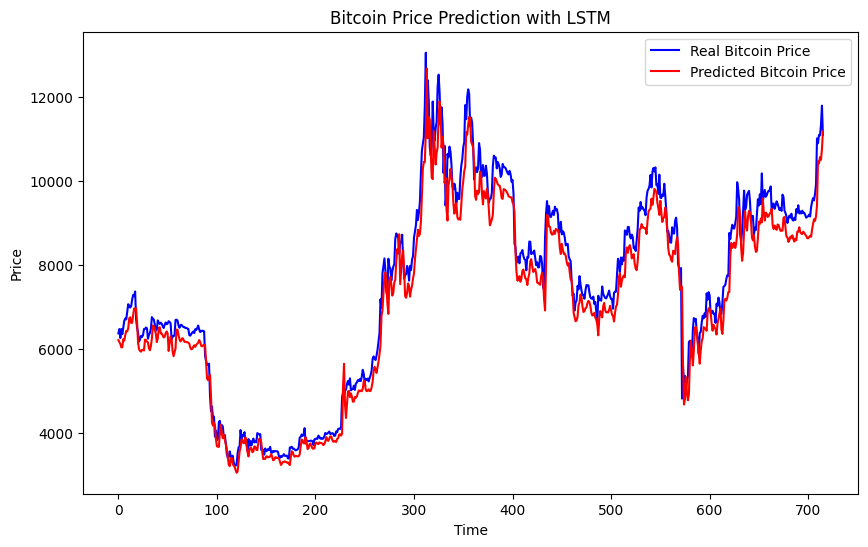

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 📌 1️⃣ Đọc dữ liệu & xử lý
data = pd.read_csv('/content/input/Bitcoin Historical Data.csv')

# Chuyển cột 'Date' thành kiểu datetime và sắp xếp theo thời gian
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')
data = data.sort_values(by='Date')

# Chuyển các cột số thành float sau khi loại bỏ dấu phẩy
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].astype(str).str.replace(',', '').astype(float)

# Xử lý cột 'Vol.'
def convert_volume(value):
    if value == '-' or pd.isna(value):
        return 0  # Thay thế bằng 0 nếu dữ liệu trống
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    else:
        return float(value)

data['Vol.'] = data['Vol.'].apply(convert_volume)

# Loại bỏ các dòng có giá trị NaN (nếu có)
data.dropna(inplace=True)

# 📌 2️⃣ Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol.']])

# 📌 3️⃣ Xử lý dữ liệu theo Sliding Window (90 ngày)
TIME_STEP = 90
X, y = [], []

for i in range(TIME_STEP, len(scaled_data)):
    X.append(scaled_data[i - TIME_STEP:i, :])  # Lấy 90 ngày trước đó làm input
    y.append(scaled_data[i, 0])  # Giá Bitcoin ngày tiếp theo là output

X, y = np.array(X), np.array(y)

# 📌 4️⃣ Chia tập dữ liệu Train/Test (Không shuffle để giữ trật tự thời gian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

# 📌 5️⃣ Xây dựng mô hình LSTM
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Hồi quy nên không dùng activation sigmoid
])

# 📌 6️⃣ Compile mô hình
model.compile(loss='mean_squared_error', optimizer='adam')

# 📌 7️⃣ Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# 📌 8️⃣ Dự đoán giá Bitcoin
predictions = model.predict(X_test)

# 📌 9️⃣ Chuyển đổi lại giá trị dự đoán về giá thực tế
y_test_real = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4)))))[:, 0]
predictions_real = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], 4)))))[:, 0]

# 📌 🔟 Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.plot(y_test_real, color='blue', label='Real Bitcoin Price')
plt.plot(predictions_real, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [15]:
#Tính các độ đo cần thiết
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1️⃣ Tính các độ đo
mse = mean_squared_error(y_test_real, predictions_real)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_real, predictions_real)

# 📌 2️⃣ Tính MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_real - predictions_real) / y_test_real)) * 100

# 📌 3️⃣ Tính R² Score
r2 = r2_score(y_test_real, predictions_real)

# 📌 4️⃣ In kết quả
print(f"MSE  (Mean Squared Error)        : {mse:.2f}")
print(f"RMSE (Root Mean Squared Error)  : {rmse:.2f}")
print(f"MAE  (Mean Absolute Error)      : {mae:.2f}")
print(f"MAPE (Mean Absolute Percentage Error) : {mape:.2f}%")
print(f"R² Score                        : {r2:.4f}")


MSE  (Mean Squared Error)        : 254619.90
RMSE (Root Mean Squared Error)  : 504.60
MAE  (Mean Absolute Error)      : 410.44
MAPE (Mean Absolute Percentage Error) : 5.40%
R² Score                        : 0.9532
